In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_data=pd.read_csv("train.csv")

In [3]:
test_data=pd.read_csv("test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())


0
0


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)


In [11]:
avg_age = train_data['Age'].mean()
train_data.Age.replace(np.nan, avg_age, inplace = True)

avg_age = test_data['Age'].mean()
test_data.Age.replace(np.nan, avg_age, inplace = True)


In [12]:
freq_port = train_data.Embarked.dropna().mode()[0]
train_data['Embarked'] = train_data['Embarked'].fillna(freq_port)


In [13]:
avg_fare = test_data['Fare'].mean()
test_data.Fare.replace(np.nan, avg_fare, inplace = True)


In [14]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

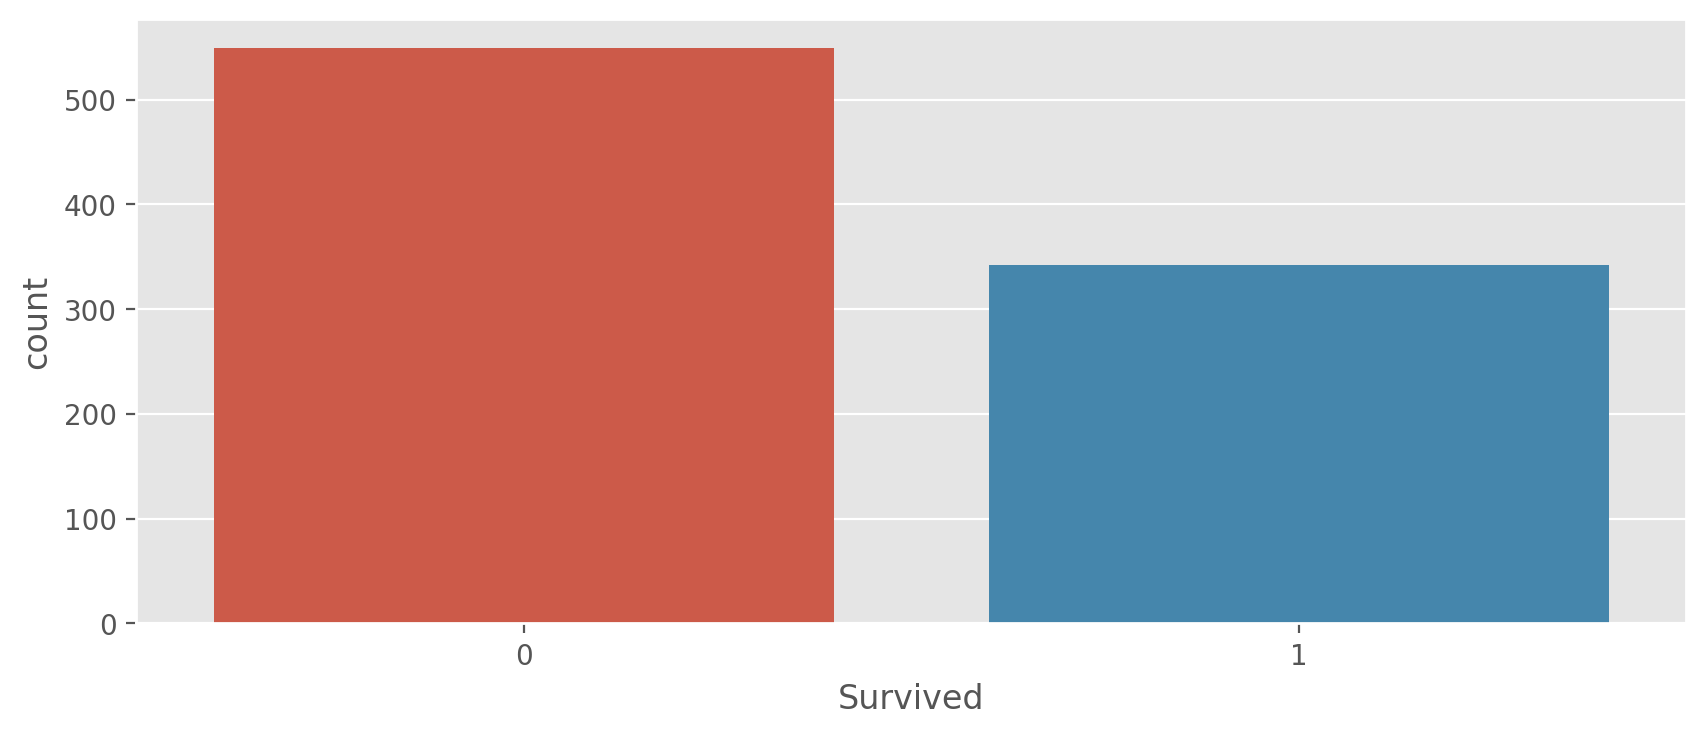

In [16]:
plt.figure(figsize = (10,4), dpi = 200)
sns.countplot(x = 'Survived', data = train_data)


In [17]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

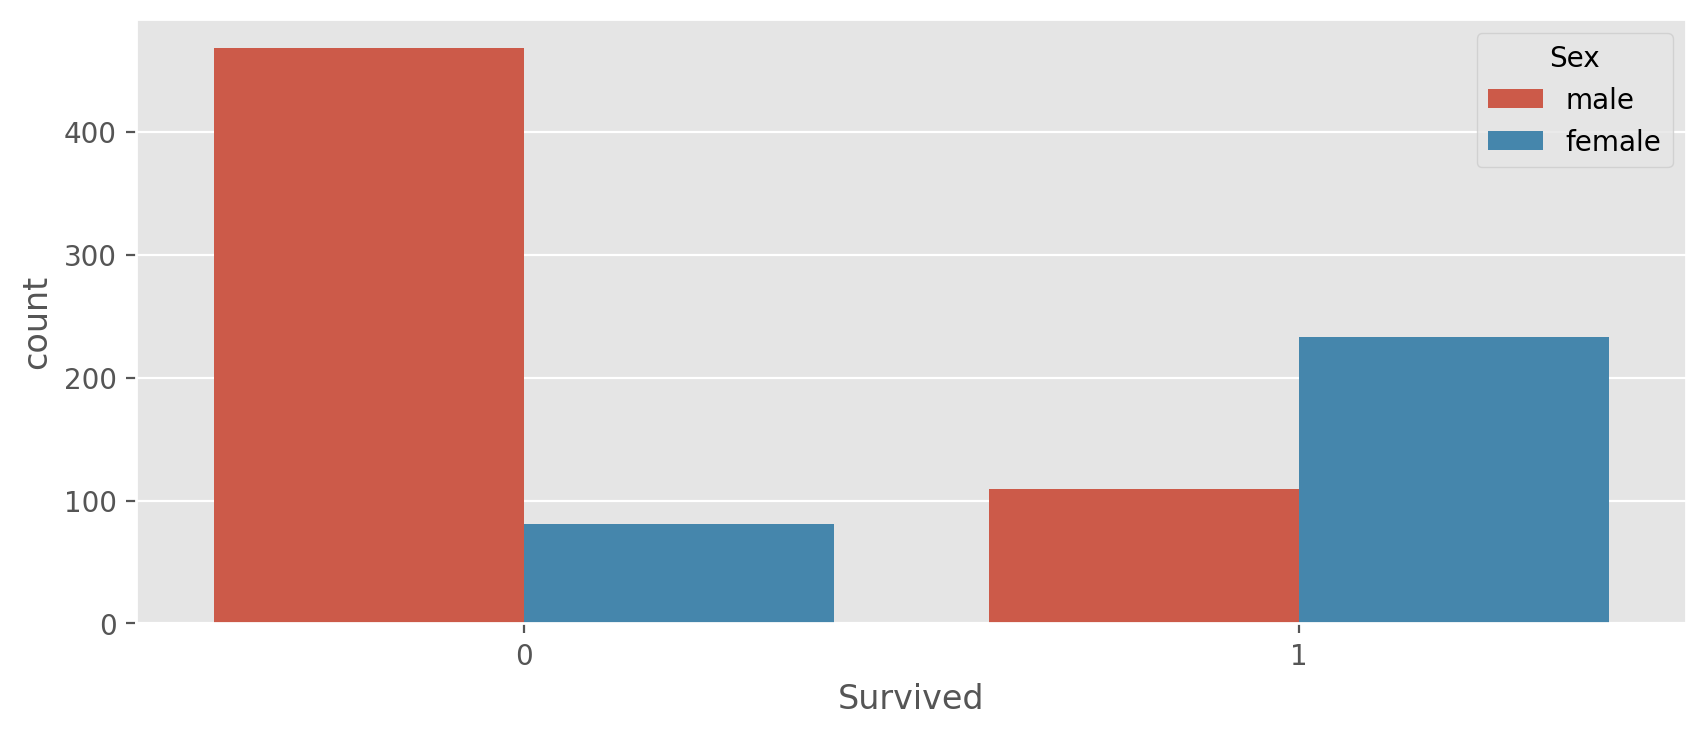

In [18]:
plt.figure(figsize = (10,4), dpi = 200)
sns.countplot(x = 'Survived',hue="Sex", data = train_data)


In [19]:
train_data.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [20]:
train_data.groupby(['Sex'])['Survived'].value_counts(normalize=True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

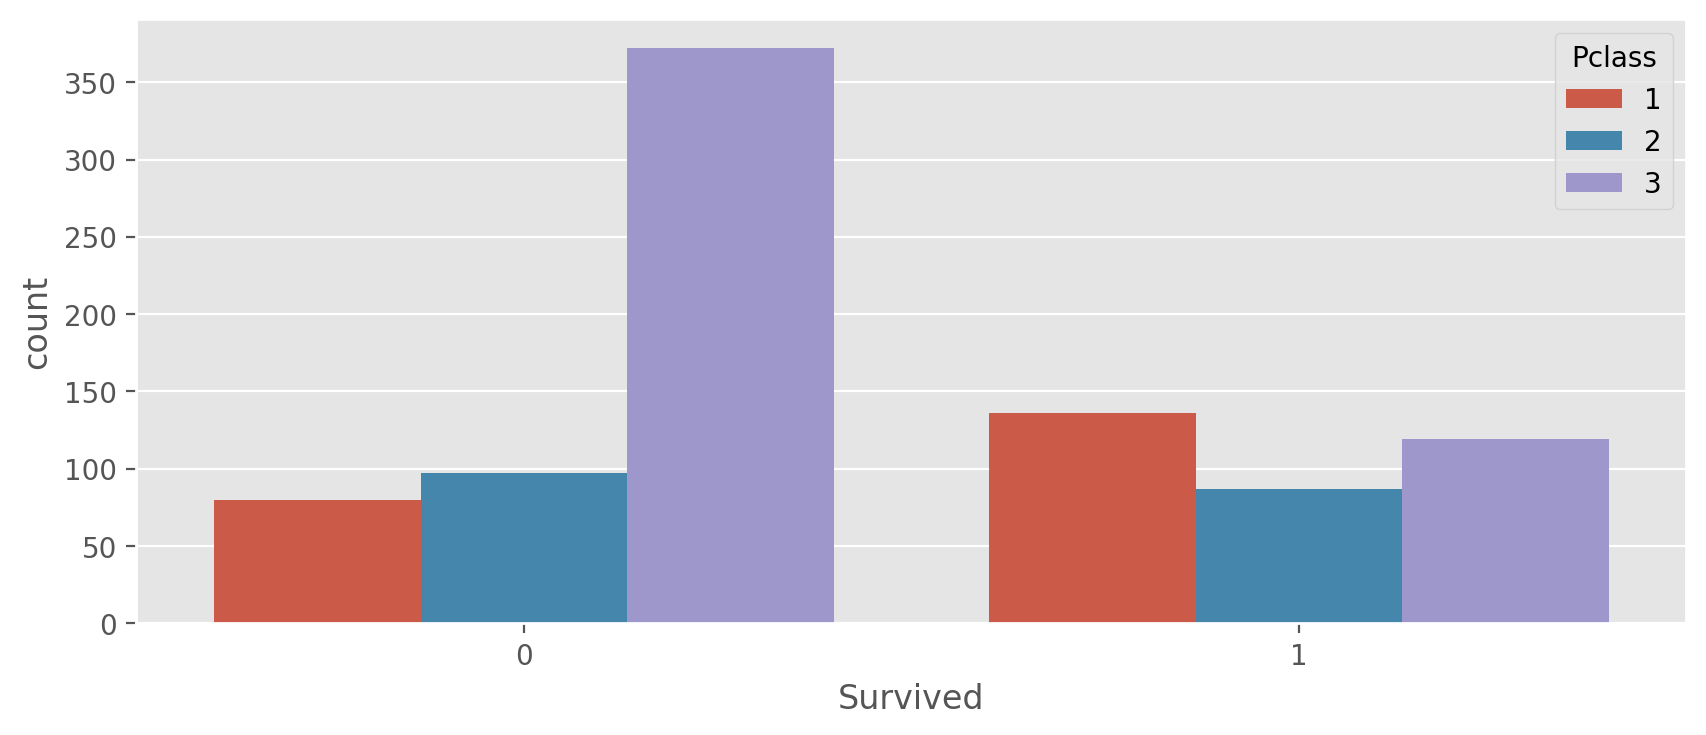

In [21]:
plt.figure(figsize = (10,4), dpi = 200)
sns.countplot(x = 'Survived',hue="Pclass", data = train_data)


In [22]:
train_data.groupby(['Pclass'])['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

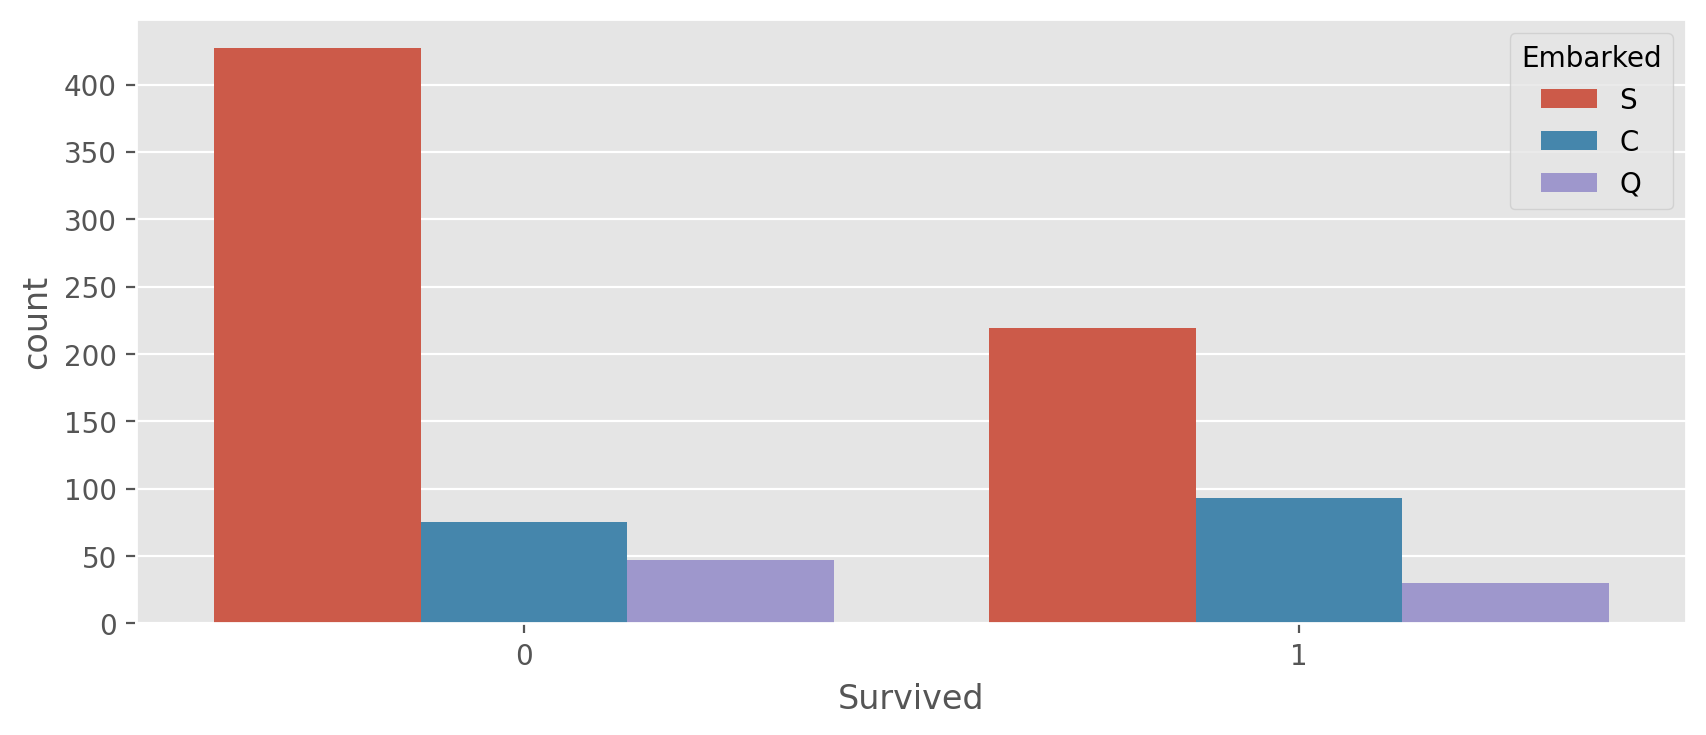

In [23]:
plt.figure(figsize = (10,4), dpi = 200)
sns.countplot(x = 'Survived',hue="Embarked", data = train_data)


In [24]:
train_data.groupby(['Embarked'])['Survived'].value_counts(normalize=True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

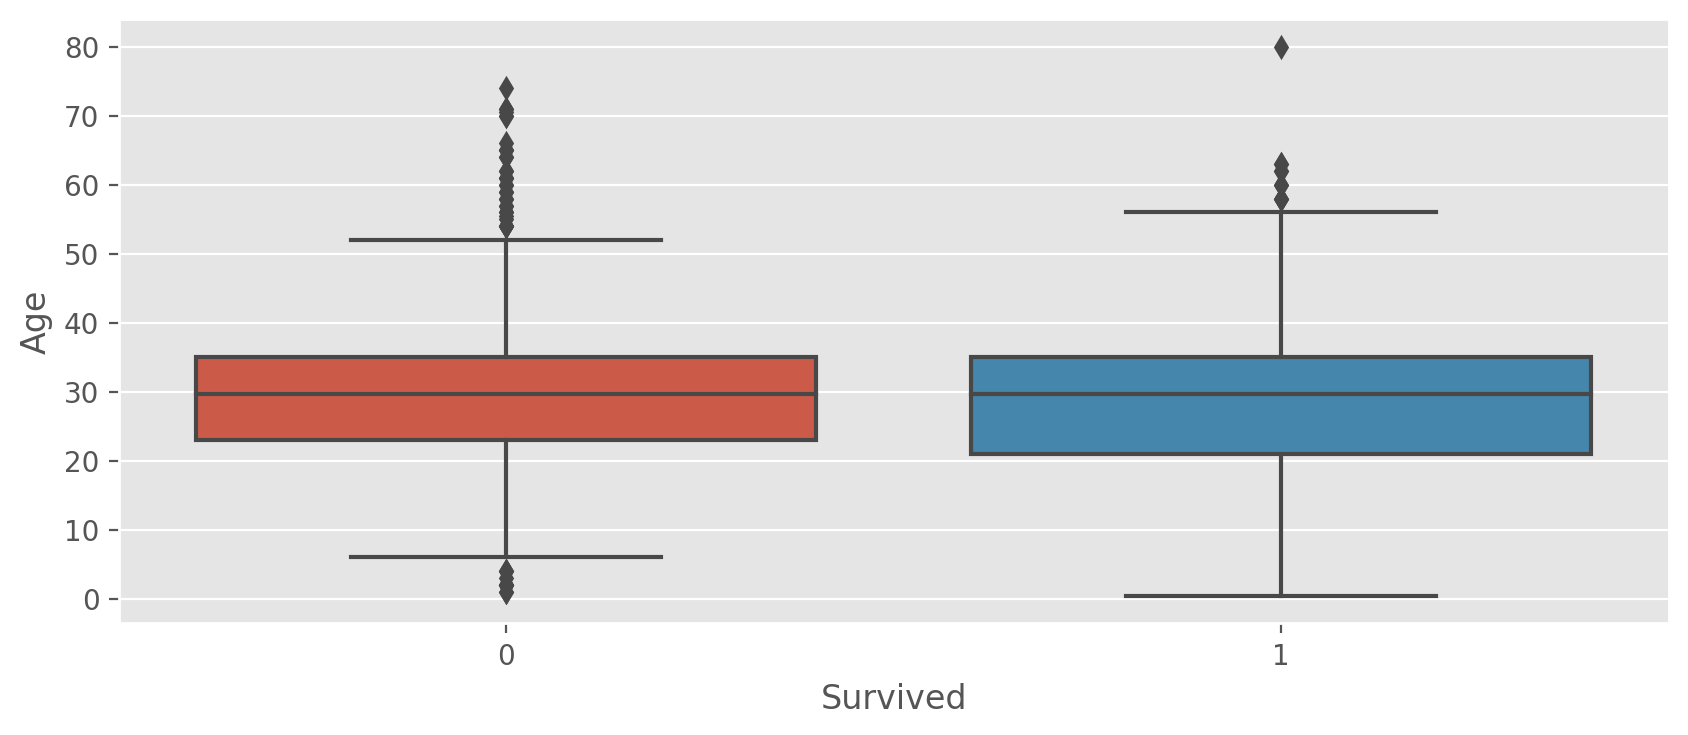

In [25]:
plt.figure(figsize = (10,4), dpi = 200)
sns.boxplot(x = 'Survived',y="Age", data = train_data)


<AxesSubplot:xlabel='Survived', ylabel='Age'>

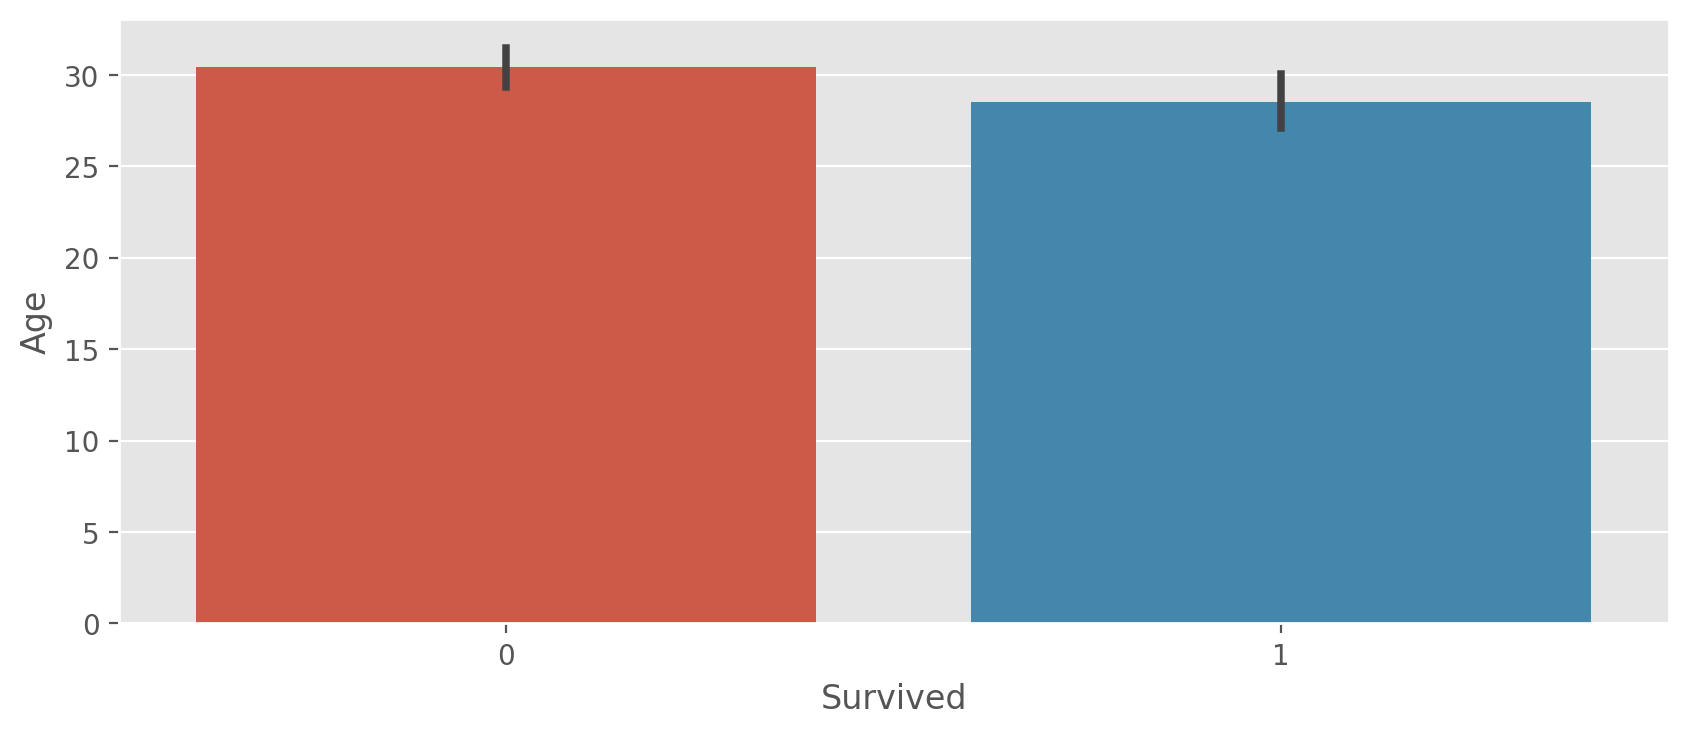

In [26]:
plt.figure(figsize = (10,4), dpi = 200)
sns.barplot(x = 'Survived',y="Age", data = train_data)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

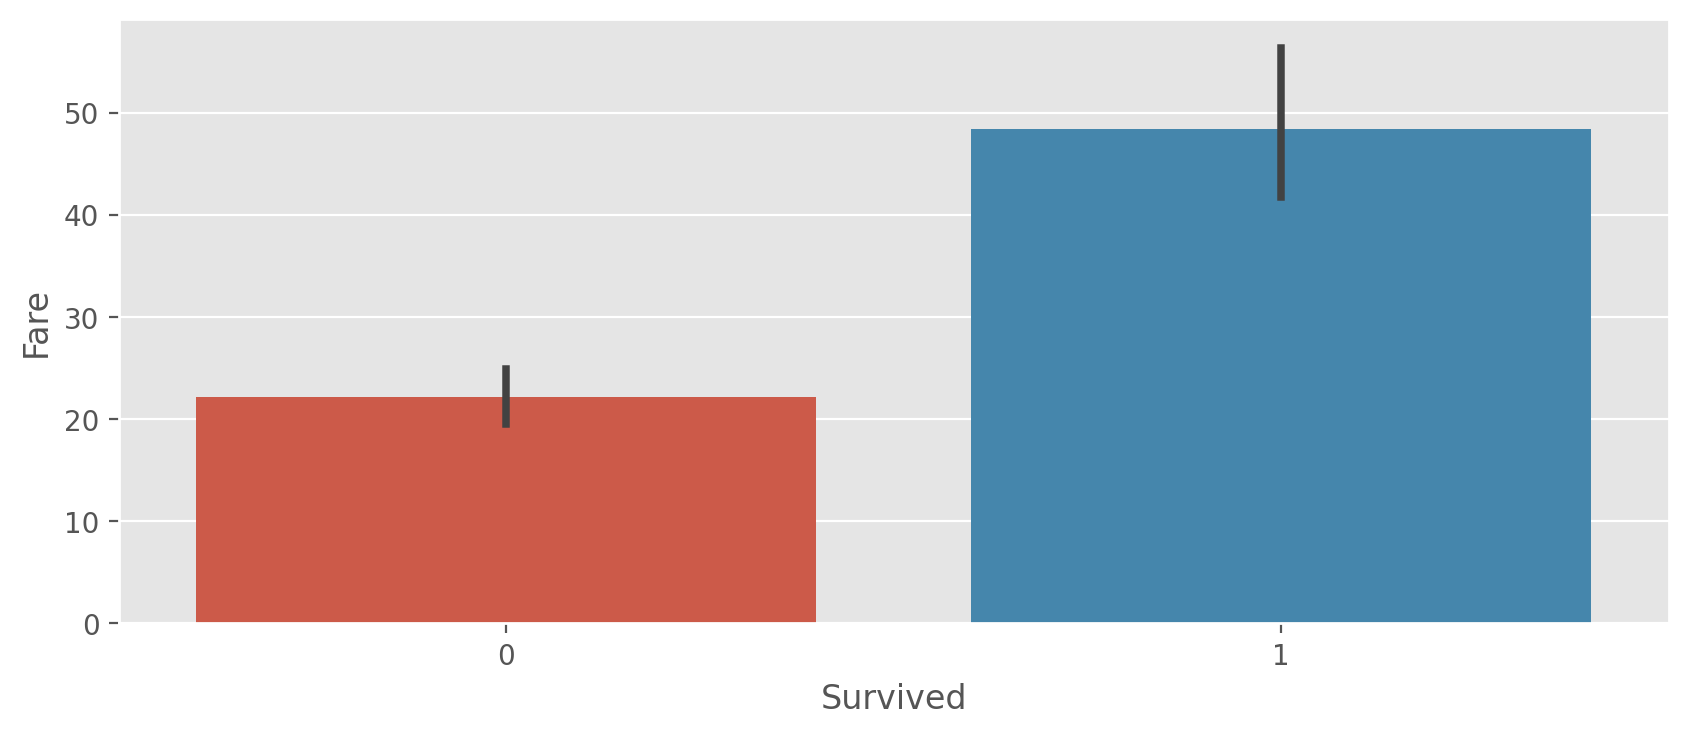

In [27]:
plt.figure(figsize = (10,4), dpi = 200)
sns.barplot(x = 'Survived',y="Fare", data = train_data)


<AxesSubplot:xlabel='Survived', ylabel='Fare'>

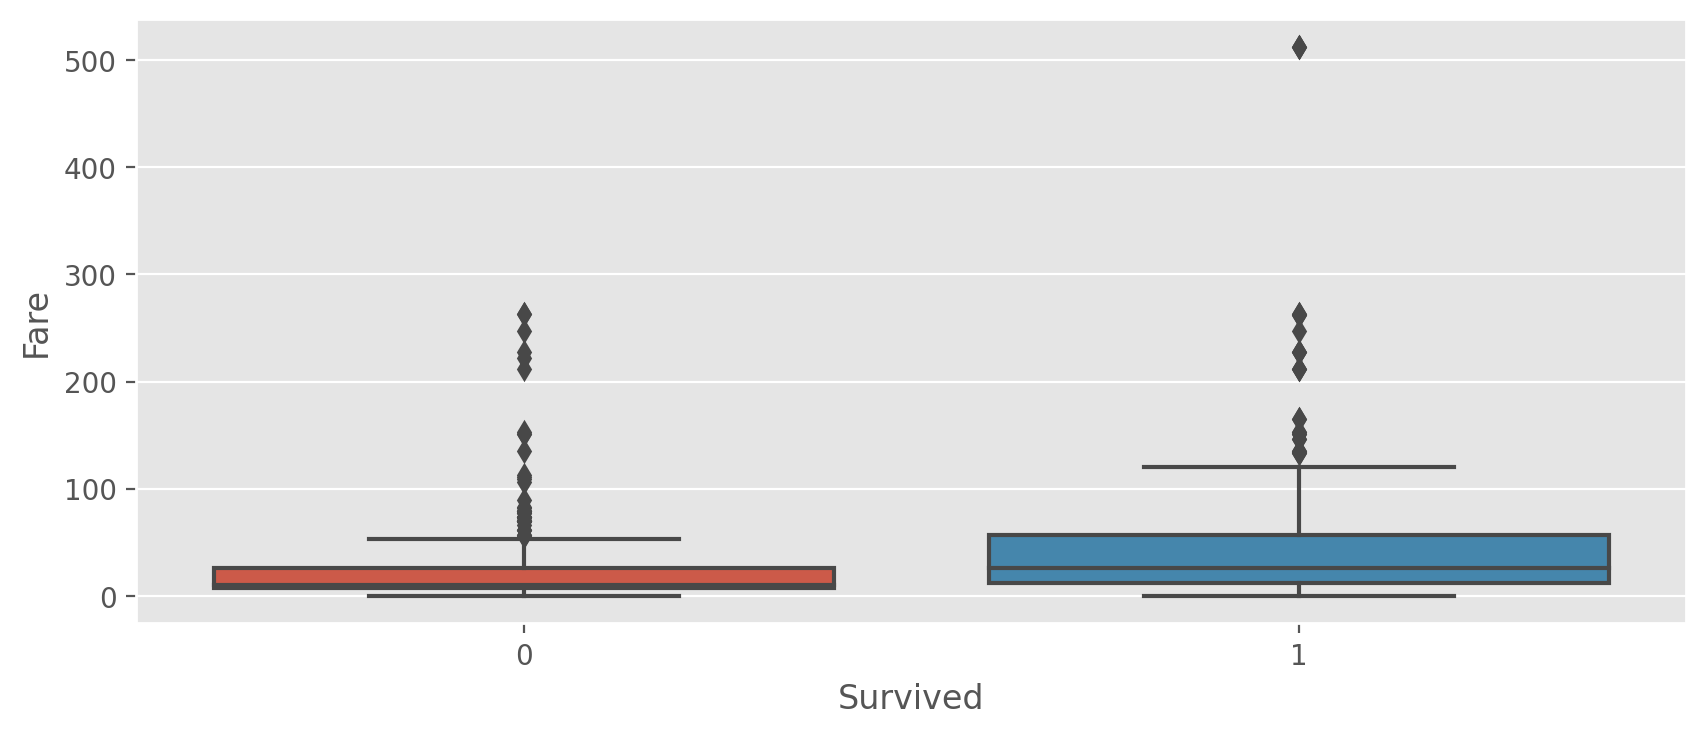

In [28]:
plt.figure(figsize = (10,4), dpi = 200)
sns.boxplot(x = 'Survived',y="Fare", data = train_data)


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

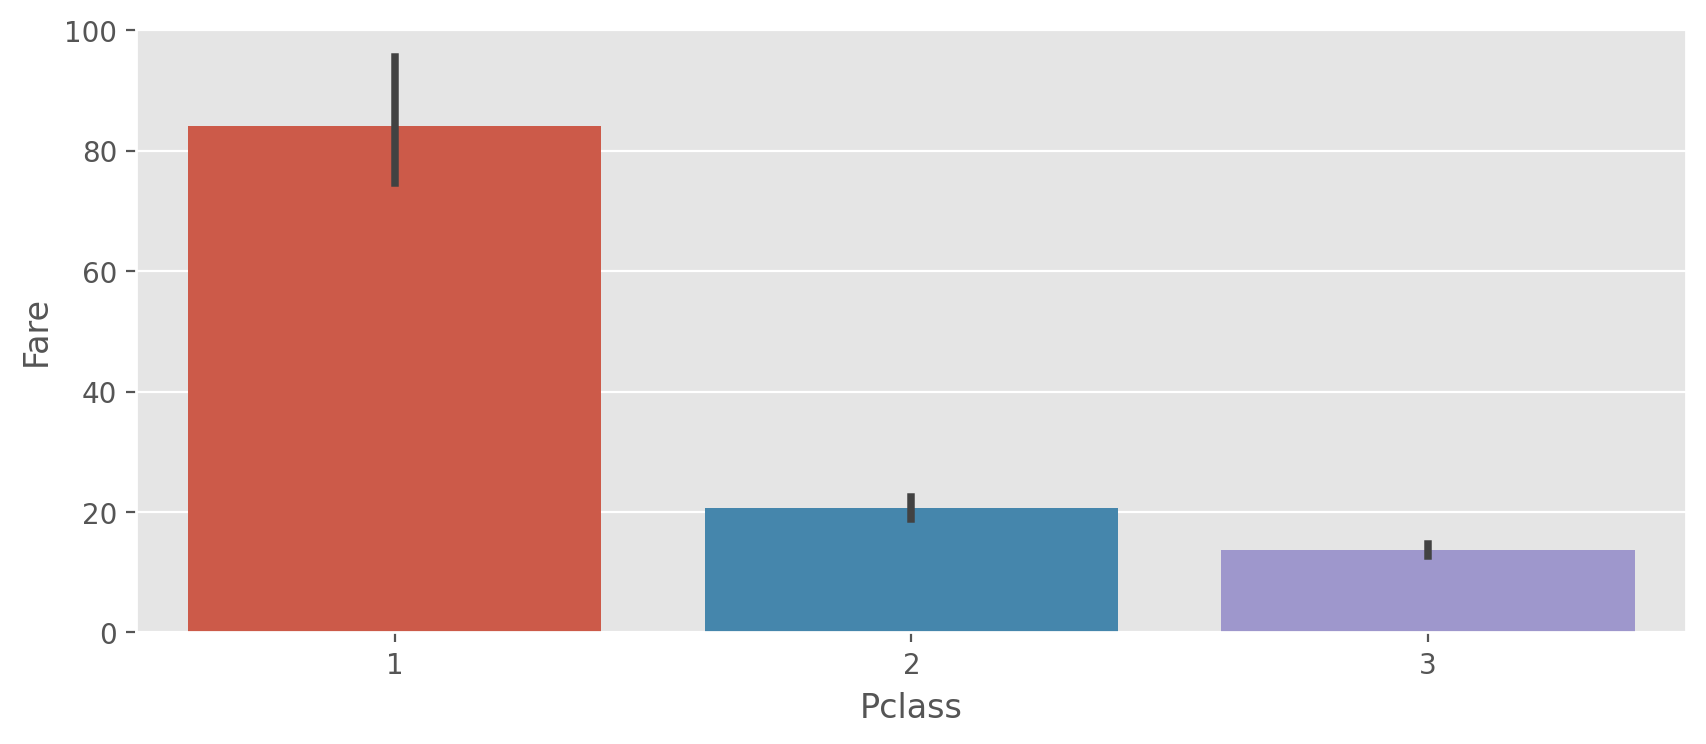

In [29]:
plt.figure(figsize = (10,4), dpi = 200)
sns.barplot(x = 'Pclass',y="Fare", data = train_data)


In [30]:
# Creating a new  column
train_data["Fam_memebers"]=train_data['SibSp']+train_data["Parch"]

In [31]:
test_data["Fam_memebers"]=test_data['SibSp']+test_data["Parch"]

### Handling Categorical Values

In [32]:
train_data['Sex'] = train_data['Sex'].map({'female' : 1, 'male' : 0}).astype(int)
test_data['Sex'] = test_data['Sex'].map({'female' : 1, 'male' : 0}).astype(int)


In [33]:
train_data['Embarked'] = train_data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)


In [34]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fam_memebers
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0


### Binning or creating bands

In [35]:
dataset = [train_data, test_data]
for data in dataset:
    data.loc[data['Age'] <= 20, 'Age'] = 0
    data.loc[(data['Age'] > 20) & (data['Age'] <= 40), 'Age'] = 1
    data.loc[data['Age'] > 40, 'Age'] = 2


In [36]:
print(train_data.Fare.quantile(0.30))
print(train_data.Fare.quantile(0.60))

8.05
21.6792


In [37]:
dataset = [train_data, test_data]
for data in dataset:
    data.loc[data['Fare'] <= 8, 'Fare'] = 0
    data.loc[(data['Fare'] > 8) & (data['Fare'] <= 21), 'Fare'] = 1
    data.loc[data['Fare'] > 21, 'Fare'] = 2


In [38]:
train_data.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis=1,inplace=True)
test_data.drop(['PassengerId','Name','SibSp','Parch','Ticket'],axis=1,inplace=True)

In [39]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam_memebers
0,0,3,0,1.0,0.0,0,1
1,1,1,1,1.0,2.0,1,1
2,1,3,1,1.0,0.0,0,0
3,1,1,1,1.0,2.0,0,1
4,0,3,0,1.0,1.0,0,0


In [40]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Fam_memebers
0,3,0,1.0,0.0,2,0
1,3,1,2.0,0.0,0,1
2,2,0,2.0,1.0,2,0
3,3,0,1.0,1.0,0,0
4,3,1,1.0,1.0,0,2


In [41]:
X=train_data.drop("Survived",axis=1).values
Y=train_data['Survived']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)


In [43]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [44]:
pred_train=classifier.predict(x_train)
pred_test=classifier.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
train_accuracy=accuracy_score(y_train,pred_train)
test_accuracy=accuracy_score(y_test,pred_test)

print("Training Accuracy :",train_accuracy)
print("Testing Accuracy :",test_accuracy)

Training Accuracy : 0.7991573033707865
Testing Accuracy : 0.8156424581005587


### Submission

In [46]:
test_data.head()

,Pclass,Sex,Age,Fare,Embarked,Fam_memebers
0,3,0,1.0,0.0,2,0
1,3,1,2.0,0.0,0,1
2,2,0,2.0,1.0,2,0
3,3,0,1.0,1.0,0,0
4,3,1,1.0,1.0,0,2
